## <center>TABLE OF CONTENTS</center>

1. [Load Libraries and Datasets](#1.-Load-Libraries-and-Datasets)  
    * 1.1) [Importing AIRBUS .csv Files](#1.1-Importing-AIRBUS-.csv-Files)  
    * 1.2) [Summarize ](#1.2-Summarize)  
    * 1.3) [Improve UTC Time Feature](#1.3-Improve-UTC-Time-Feature)

2. [Inspect](#2.-Inspct)  
    * 2.1) [Null Values](#2.2-NaN's)  



---
# 1. Load Libraries and Datasets


---




In [1]:
# Mount Google Drive to access the CSV file
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Mounted at /content/drive


## 1.1 Importing AIRBUS .csv Files

In [2]:
msn02= pd.read_csv('/content/drive/MyDrive/IE/CORPORATE_PROJECT_AIRBUS/01_DATA/msn_02_fuel_leak_signals_preprocessed.csv', sep=";")
msn10= pd.read_csv('/content/drive/MyDrive/IE/CORPORATE_PROJECT_AIRBUS/01_DATA/msn_10_fuel_leak_signals_preprocessed.csv', sep=";")
msn11= pd.read_csv('/content/drive/MyDrive/IE/CORPORATE_PROJECT_AIRBUS/01_DATA/msn_11_fuel_leak_signals_preprocessed.csv', sep=";")
msn12= pd.read_csv('/content/drive/MyDrive/IE/CORPORATE_PROJECT_AIRBUS/01_DATA/msn_12_fuel_leak_signals_preprocessed.csv', sep=";")
msn14= pd.read_csv('/content/drive/MyDrive/IE/CORPORATE_PROJECT_AIRBUS/01_DATA/msn_14_fuel_leak_signals_preprocessed.csv', sep=";")
msn29= pd.read_csv('/content/drive/MyDrive/IE/CORPORATE_PROJECT_AIRBUS/01_DATA/msn_29_fuel_leak_signals_preprocessed.csv', sep=";")
msn37= pd.read_csv('/content/drive/MyDrive/IE/CORPORATE_PROJECT_AIRBUS/01_DATA/msn_37_fuel_leak_signals_preprocessed.csv', sep=";")
msn53= pd.read_csv('/content/drive/MyDrive/IE/CORPORATE_PROJECT_AIRBUS/01_DATA/msn_53_fuel_leak_signals_preprocessed.csv', sep=";")


## 1.2 Summarize


In [39]:
aircrafts=[msn02,msn10,msn11,msn12,msn14,msn29,msn37,msn53]
names=["msn02","msn10","msn11","msn12","msn14","msn29","msn37","msn53"]

In [38]:


data = {}

data['Records'] = [aircraft.shape[0] for aircraft in aircrafts]
data['Features'] = [aircraft.shape[1] for aircraft in aircrafts]
data["NaNs"] = [list(aircraft.isnull().sum()) for aircraft in aircrafts]

# Calculate NaNs percentage for each aircraft
nan_percentages = []
for aircraft, nan_counts in zip(aircrafts, data["NaNs"]):
    nan_percentages.append([round(count / aircraft.shape[0] * 100, 2) for count in nan_counts])

data["NaNs Percentage"] = nan_percentages

# Calculate the number of duplicated rows for each aircraft
duplicated_rows = []
for aircraft in aircrafts:
    duplicates = aircraft[aircraft.duplicated(subset=['UTC_TIME'], keep=False)]
    num_duplicates = len(duplicates)
    duplicated_rows.append(num_duplicates)

data["Duplicated Rows"] = duplicated_rows

# Create DataFrame
df = pd.DataFrame(data, index=names)



       Records  Features                                               NaNs  \
msn02   623580       113  [0, 0, 0, 0, 0, 0, 0, 0, 0, 62922, 108643, 106...   
msn10   621610        19  [0, 0, 0, 562272, 560674, 565835, 82937, 82937...   
msn11  4455992        19  [0, 0, 0, 4131081, 4139824, 4164851, 300327, 3...   
msn12  3247664        19  [0, 0, 0, 3123512, 3124135, 3124839, 40360, 40...   
msn14  4640993        19  [0, 0, 0, 4372059, 4371649, 4374096, 65487, 65...   
msn29  4129447        19  [0, 0, 0, 3843623, 3849617, 3852202, 319525, 3...   
msn37  3236645        19  [0, 0, 0, 2919211, 2919569, 2919530, 73299, 73...   
msn53  3034227        19  [0, 0, 0, 2767417, 2767748, 2767042, 47079, 47...   

                                         NaNs Percentage  Duplicated Rows  
msn02  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...            26948  
msn10  [0.0, 0.0, 0.0, 90.45, 90.2, 91.03, 13.34, 13....                0  
msn11  [0.0, 0.0, 0.0, 92.71, 92.9, 93.47, 6.74, 6.74...    

In [40]:
df

,Records,Features,NaNs,NaNs Percentage,Duplicated Rows
msn02,623580,113,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 62922, 108643, 106...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",26948
msn10,621610,19,"[0, 0, 0, 562272, 560674, 565835, 82937, 82937...","[0.0, 0.0, 0.0, 90.45, 90.2, 91.03, 13.34, 13....",0
msn11,4455992,19,"[0, 0, 0, 4131081, 4139824, 4164851, 300327, 3...","[0.0, 0.0, 0.0, 92.71, 92.9, 93.47, 6.74, 6.74...",0
msn12,3247664,19,"[0, 0, 0, 3123512, 3124135, 3124839, 40360, 40...","[0.0, 0.0, 0.0, 96.18, 96.2, 96.22, 1.24, 1.24...",0
msn14,4640993,19,"[0, 0, 0, 4372059, 4371649, 4374096, 65487, 65...","[0.0, 0.0, 0.0, 94.21, 94.2, 94.25, 1.41, 1.41...",0
msn29,4129447,19,"[0, 0, 0, 3843623, 3849617, 3852202, 319525, 3...","[0.0, 0.0, 0.0, 93.08, 93.22, 93.29, 7.74, 7.7...",0
msn37,3236645,19,"[0, 0, 0, 2919211, 2919569, 2919530, 73299, 73...","[0.0, 0.0, 0.0, 90.19, 90.2, 90.2, 2.26, 2.26,...",0
msn53,3034227,19,"[0, 0, 0, 2767417, 2767748, 2767042, 47079, 47...","[0.0, 0.0, 0.0, 91.21, 91.22, 91.19, 1.55, 1.5...",0


In [33]:
data = {}

data['Records'] = [aircraft.shape[0] for aircraft in aircrafts]
data['Features'] = [aircraft.shape[1] for aircraft in aircrafts]
data["NaNs"]=  [list(aircraft.isnull().sum()) for aircarft in aircrafts]
data["NaNs Percentage"]=  [round(x / aircraft.shape[0] * 100, 2) for x in list(aircraft.isnull().sum()) for aircarft in aircrafts]
data["Duplicated Rows"]=

pd.DataFrame(data, index = names)

,Records,Features
msn02,623580,113
msn10,621610,19
msn11,4455992,19
msn12,3247664,19
msn14,4640993,19
msn29,4129447,19
msn37,3236645,19
msn53,3034227,19


In [36]:
print('Total Number of Records:', pd.DataFrame(data, index = names )["Records"].sum())

Total Number of Records: 23990158


In [24]:
for idx, aircraft in enumerate(aircrafts):
    print(f"{aircraft.dtypes} ")
    print()

UTC_TIME                                 object
MSN                                      object
Flight                                   object
ENGINE_RUNNING_1                           bool
ENGINE_RUNNING_2                           bool
ENGINE_RUNNING_3                           bool
ENGINE_RUNNING_4                           bool
FLIGHT_PHASE_COUNT                      float64
FUEL_FLOW_1                             float64
FUEL_FLOW_2                             float64
FUEL_FLOW_3                             float64
FUEL_FLOW_4                             float64
FUEL_PITCH                              float64
FUEL_ROLL                               float64
FUEL_TRANSFER_MODE_VALUE                float64
FUEL_USED_1                             float64
FUEL_USED_2                             float64
FUEL_USED_3                             float64
FUEL_USED_4                             float64
FW_GEO_ALTITUDE                         float64
LEAK_DETECTION_LEAK_FLOW                

## 1.3 Improve UTC Time Feature

In [25]:
for idx, aircraft in enumerate(aircrafts):
    # Add datetime columns
    datetimes = pd.to_datetime(aircraft['UTC_TIME'])
    aircraft.insert(1, 'TIME', datetimes.dt.time)
    aircraft.insert(1, 'DATE', datetimes.dt.date)

# 2. Inspect


## 2.1 Null Values

In [27]:
dataframes_summary_list = []

for idx, aircraft in enumerate(aircrafts):
    summary_dict = {}
    summary_dict[f"{names[idx]}"] = list(aircraft.columns)
    summary_dict[f"{names[idx]} NAN"] = list(aircraft.isnull().sum())
    summary_dict[f"{names[idx]} NAN %"] = [round(x / aircraft.shape[0] * 100, 2) for x in list(aircraft.isnull().sum())]
    summary_dict[f"{names[idx]} Unique"] = list(aircraft.nunique())
    df = pd.DataFrame(summary_dict)
    dataframes_summary_list.append(df)

    # Printing the DataFrame for demonstration
    print(df)

print()
print("List of DataFrames:")


                                    msn02  msn02 NAN  msn02 NAN %  \
0                                UTC_TIME          0         0.00   
1                                    DATE          0         0.00   
2                                    TIME          0         0.00   
3                                     MSN          0         0.00   
4                                  Flight          0         0.00   
5                        ENGINE_RUNNING_1          0         0.00   
6                        ENGINE_RUNNING_2          0         0.00   
7                        ENGINE_RUNNING_3          0         0.00   
8                        ENGINE_RUNNING_4          0         0.00   
9                      FLIGHT_PHASE_COUNT      62922        10.09   
10                            FUEL_FLOW_1     108643        17.42   
11                            FUEL_FLOW_2     106986        17.16   
12                            FUEL_FLOW_3     106981        17.16   
13                            FUEL

In [41]:
dataframes_summary_list

[                                    msn02  msn02 NAN  msn02 NAN %  \
 0                                UTC_TIME          0         0.00   
 1                                    DATE          0         0.00   
 2                                    TIME          0         0.00   
 3                                     MSN          0         0.00   
 4                                  Flight          0         0.00   
 5                        ENGINE_RUNNING_1          0         0.00   
 6                        ENGINE_RUNNING_2          0         0.00   
 7                        ENGINE_RUNNING_3          0         0.00   
 8                        ENGINE_RUNNING_4          0         0.00   
 9                      FLIGHT_PHASE_COUNT      62922        10.09   
 10                            FUEL_FLOW_1     108643        17.42   
 11                            FUEL_FLOW_2     106986        17.16   
 12                            FUEL_FLOW_3     106981        17.16   
 13                 

**Massive NAN for FUEL_USED_i columns beginning in MSN10 onwards**

## 2.2 Duplicates

In [31]:
metadata_duplicates = {}

for idx, aircraft in enumerate(aircrafts):
    duplicates = aircraft[aircraft.duplicated(subset=['UTC_TIME'], keep=False)]
    num_duplicates = len(duplicates)
    duplicates_info = {
        'num_duplicates': num_duplicates,
        'duplicate_rows': duplicates
    }
    metadata_duplicates[names[idx]] = duplicates_info

    print(f"Metadata for duplicates in {names[idx]}:")
    print(f"Number of duplicates: {num_duplicates}")
    print("Duplicate rows:")

    print()
print("\nMetadata for all aircraft:")



Metadata for duplicates in msn02:
Number of duplicates: 26948
Duplicate rows:

Metadata for duplicates in msn10:
Number of duplicates: 0
Duplicate rows:

Metadata for duplicates in msn11:
Number of duplicates: 0
Duplicate rows:

Metadata for duplicates in msn12:
Number of duplicates: 0
Duplicate rows:

Metadata for duplicates in msn14:
Number of duplicates: 0
Duplicate rows:

Metadata for duplicates in msn29:
Number of duplicates: 0
Duplicate rows:

Metadata for duplicates in msn37:
Number of duplicates: 0
Duplicate rows:

Metadata for duplicates in msn53:
Number of duplicates: 0
Duplicate rows:


Metadata for all aircraft:


<ipython-input-32-b4f55d96dbb9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates_msn02['UTC_TIME'] = pd.to_datetime(duplicates_msn02['UTC_TIME'])


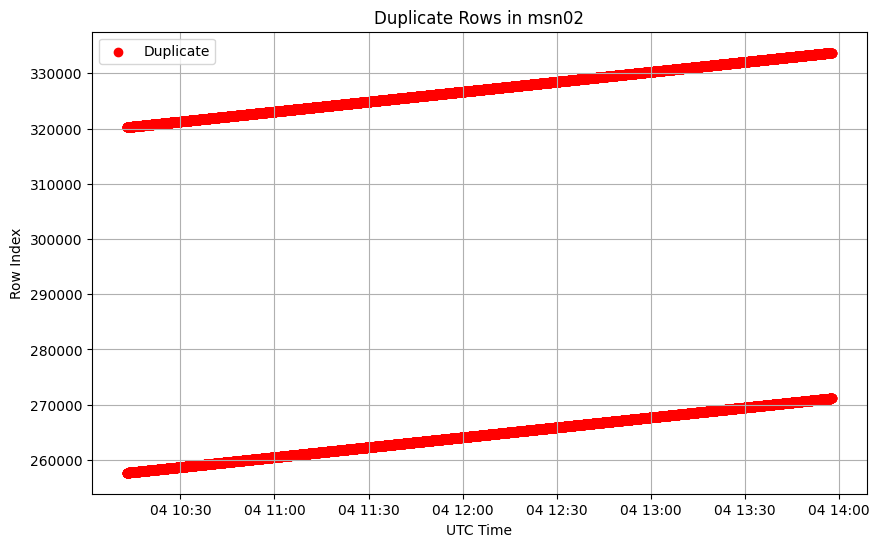

In [32]:
import matplotlib.pyplot as plt


duplicates_msn02 = metadata_duplicates["msn02"]["duplicate_rows"]


duplicates_msn02['UTC_TIME'] = pd.to_datetime(duplicates_msn02['UTC_TIME'])


plt.figure(figsize=(10, 6))
plt.scatter(duplicates_msn02['UTC_TIME'], duplicates_msn02.index, color='red', label='Duplicate')
plt.xlabel('UTC Time')
plt.ylabel('Row Index')
plt.title('Duplicate Rows in msn02')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-35-feab785cf825>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates_msn02['UTC_TIME'] = pd.to_datetime(duplicates_msn02['UTC_TIME'])


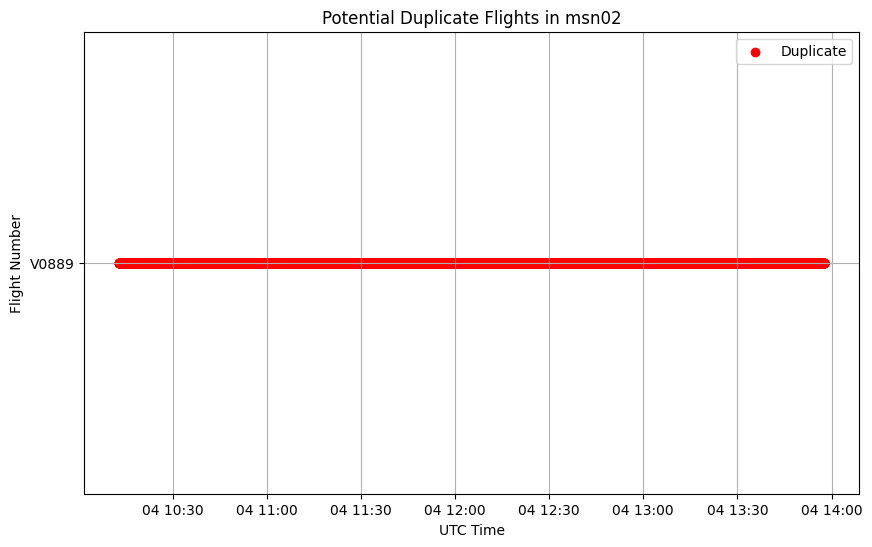

In [35]:
# Selecting duplicates for msn02 based on both UTC_TIME and Flight columns
duplicates_msn02 = metadata_duplicates["msn02"]["duplicate_rows"]

# Convert UTC_TIME to datetime format
duplicates_msn02['UTC_TIME'] = pd.to_datetime(duplicates_msn02['UTC_TIME'])

# Plotting duplicates
plt.figure(figsize=(10, 6))
plt.scatter(duplicates_msn02['UTC_TIME'], duplicates_msn02['Flight'], color='red', label='Duplicate')
plt.xlabel('UTC Time')
plt.ylabel('Flight Number')
plt.title('Potential Duplicate Flights in msn02')
plt.legend()
plt.grid(True)
plt.show()


## 2.3 Average duration of flight


In [45]:
# Convert 'UTC_TIME' to datetime
msn02['UTC_TIME'] = pd.to_datetime(msn02['UTC_TIME'])

# Create new columns for date and time
msn02['DATE'] = msn02['UTC_TIME'].dt.date
msn02['TIME'] = msn02['UTC_TIME'].dt.time
flight_durations = msn02.groupby('Flight')['UTC_TIME'].agg([min, max])
flight_durations['Duration'] = (flight_durations['max'] - flight_durations['min']).dt.total_seconds() / 60

# Calculate the average duration across all flights
average_duration = flight_durations['Duration'].mean()

average_duration

242.0888888888889

so its around 4h in total  


In [46]:
phase_8_flights = msn02[msn02["FLIGHT_PHASE_COUNT"] == 8]
flight_durations = phase_8_flights.groupby('Flight')['UTC_TIME'].agg([min, max])
flight_durations['Duration'] = (flight_durations['max'] - flight_durations['min']).dt.total_seconds() / 60

# Calculate the average duration across all flights
average_duration = flight_durations['Duration'].mean()

average_duration

161.97261904761905